### __Experiment 1__ ###

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# One-hot encoding for the characters in "Hello"
data = {
    'H': [1, 0, 0, 0, 0],
    'e': [0, 1, 0, 0, 0],
    'l': [0, 0, 1, 0, 0],
    'o': [0, 0, 0, 1, 0],
    ' ': [0, 0, 0, 0, 1]
}

# Input and output sequence for "Hello"
X_train = np.array([data['H'], data['e'], data['l'], data['l'], data['o']])
y_train = np.array([data['e'], data['l'], data['l'], data['o'], data[' ']])

# Define a simple ANN model
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))  # Input and hidden layer
model.add(Dense(5, activation='softmax'))            # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

# Predict the next character given 'H'
prediction = model.predict(np.array([data['H']]))
print("Predicted character probabilities for 'e':", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Predicted character probabilities for 'e': [[0.11488558 0.2147834  0.21894248 0.18184929 0.2695392 ]]


### __Experiment 2__ ###

In [11]:
def input_matrix(rows, cols):
    matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            element = float(input(f"Enter element at position ({i+1},{j+1}): "))
            row.append(element)
        matrix.append(row)
    return matrix

def display_matrix(matrix):
    for row in matrix:
        print("  ".join(map(str, row)))

def add_matrices(matrix_a, matrix_b, rows, cols):
    result_matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            row.append(matrix_a[i][j] + matrix_b[i][j])
        result_matrix.append(row)
    return result_matrix

if __name__ == "__main__":
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))
    
    matrix_a = input_matrix(rows, cols)
    matrix_b = input_matrix(rows, cols)
    
    result_matrix = add_matrices(matrix_a, matrix_b, rows, cols)
    
    display_matrix(result_matrix)

6.0  8.0
10.0  12.0


In [12]:
import numpy as np

matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

result = matrix1 + matrix2

print("Matrix Addition Result:")
print(result)

Matrix Addition Result:
[[ 6  8]
 [10 12]]


In [8]:
import tensorflow as tf

matrix_a = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
matrix_b = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

result_matrix = tf.add(matrix_a, matrix_b)

print("Result Matrix (A + B):")
print(result_matrix)

Result Matrix (A + B):
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)


### __Experiment 3__ ###

In [13]:
def input_matrix(rows, cols, name="Matrix"):
    matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            element = float(input(f"Enter element at position ({i+1},{j+1}): "))
            row.append(element)
        matrix.append(row)
    return matrix

def multiply_matrices(matrix_a, matrix_b, rows_a, cols_a, cols_b):
    result_matrix = []
    for i in range(rows_a):
        row = []
        for j in range(cols_b):
            element_sum = 0
            for k in range(cols_a):
                element_sum += matrix_a[i][k] * matrix_b[k][j]
            row.append(element_sum)
        result_matrix.append(row)
    return result_matrix

def display_matrix(matrix, name="Matrix"):
    print(f"{name}:")
    for row in matrix:
        print("  ".join(map(str, row)))

if __name__ == "__main__":
    rows_a = int(input("Enter the number of rows for Matrix A: "))
    cols_a = int(input("Enter the number of columns for Matrix A: "))
    rows_b = int(input("Enter the number of rows for Matrix B: "))
    cols_b = int(input("Enter the number of columns for Matrix B: "))
    
    if cols_a != rows_b:
        print("Matrix multiplication not possible. The number of columns in Matrix A must equal the number of rows in Matrix B.")
    else:
        matrix_a = input_matrix(rows_a, cols_a, "Matrix A")
        matrix_b = input_matrix(rows_b, cols_b, "Matrix B")
        result_matrix = multiply_matrices(matrix_a, matrix_b, rows_a, cols_a, cols_b)
        display_matrix(matrix_a, "Matrix A")
        display_matrix(matrix_b, "Matrix B")
        display_matrix(result_matrix, "Result Matrix (A * B)")

Matrix A:
1.0  2.0  3.0
4.0  5.0  6.0
Matrix B:
7.0  8.0
9.0  10.0
11.0  12.0
Result Matrix (A * B):
58.0  64.0
139.0  154.0


In [15]:
import numpy as np

matrix1 = np.array([[1, 2, 3], [4, 5, 6]])
matrix2 = np.array([[7, 8], [9, 10], [11, 12]])

result = np.dot(matrix1, matrix2)

print("Matrix Multiplication Result:")
print(result)

Matrix Multiplication Result:
[[ 58  64]
 [139 154]]


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def generate_data(num_samples, rows_a, cols_a, cols_b):
    x1 = np.random.rand(num_samples, rows_a, cols_a)
    x2 = np.random.rand(num_samples, cols_a, cols_b)
    y = np.array([np.dot(x1[i], x2[i]) for i in range(num_samples)])
    return x1, x2, y

def create_model(rows_a, cols_a, cols_b):
    model = keras.Sequential([
        layers.Input(shape=(rows_a, cols_a)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(rows_a * cols_b, activation='linear'),
        layers.Reshape((rows_a, cols_b))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

num_samples = 10000
rows_a, cols_a, cols_b = 2, 3, 2
x1, x2, y = generate_data(num_samples, rows_a, cols_a, cols_b)
model = create_model(rows_a, cols_a, cols_b)
model.fit(x1, y, epochs=50, batch_size=32)

test_a = np.array([[[1, 2, 3], [4, 5, 6]]])
test_b = np.array([[[7, 8], [9, 10], [11, 12]]])
predicted = model.predict(test_a)

print("Matrix A:")
print(test_a[0])
print("Matrix B:")
print(test_b[0])
print("Predicted Result of A * B:")
print(predicted[0])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1722
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0843
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0854
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0852
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0857
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0850
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0841
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0861
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0843
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0862
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0845
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0840
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0839
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0846
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

### __Experiment 4__ ###

In [19]:
def input_matrix(rows, cols, name="Matrix"):
    matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            element = float(input(f"Enter element at position ({i+1},{j+1}): "))
            row.append(element)
        matrix.append(row)
    return matrix

def transpose_matrix(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def display_matrix(matrix, name="Matrix"):
    print(f"{name}:")
    for row in matrix:
        print("  ".join(map(str, row)))

if __name__ == "__main__":
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))
    
    matrix = input_matrix(rows, cols, "Original Matrix")
    transposed = transpose_matrix(matrix)
    
    display_matrix(matrix, "Original Matrix")
    display_matrix(transposed, "Transposed Matrix")

Original Matrix:
1.0  2.0
3.0  4.0
Transposed Matrix:
1.0  3.0
2.0  4.0


In [17]:
import numpy as np

matrix = np.array([[1, 2], [3, 4]])

result = np.transpose(matrix)

print("Matrix Transpose Result:")
print(result)

Matrix Transpose Result:
[[1 3]
 [2 4]]


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def generate_data(num_samples, rows, cols):
    x = np.random.rand(num_samples, rows, cols)
    y = np.array([x[i].T for i in range(num_samples)])
    return x, y

def create_model(rows, cols):
    model = keras.Sequential([
        layers.Input(shape=(rows, cols)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(cols * rows, activation='linear'),
        layers.Reshape((cols, rows))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

num_samples = 10000
rows, cols = 2, 3
x, y = generate_data(num_samples, rows, cols)
model = create_model(rows, cols)
model.fit(x, y, epochs=50, batch_size=32)

test_matrix = np.array([[[1, 2, 3], [4, 5, 6]]])
predicted_transpose = model.predict(test_matrix)

print("Original Matrix:")
print(test_matrix[0])
print("Predicted Transposed Matrix:")
print(predicted_transpose[0])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0699
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.5979e-04
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.7602e-05
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5455e-05
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9210e-05
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0121e-05
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4554e-05
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8448e-06
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3135e-06
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5.4295e-06
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.3133e-06
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.5077e-06
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5825e-06
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2146e-06
Epoc

## __Activity__ ##

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def activation_function(self, x):
        # Step function (binary threshold)
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training process
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Linear combination: w.x + b
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply step function
                y_pred = self.activation_function(linear_output)
                
                # Calculate update (y - y_pred)
                update = self.lr * (y[idx] - y_pred)
                
                # Update weights and bias
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_function(linear_output)
        return y_pred

# Example dataset (AND logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate labels

# Initialize perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)

# Train the perceptron
p.fit(X, y)

# Predict for the same input
predictions = p.predict(X)
print(predictions)


[0 0 0 1]


In [4]:
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

# Load the Breast Cancer dataset 
data = load_breast_cancer() 
X = data.data 
y = data.target 
print(X.shape) 
print(y.shape)

(569, 30)
(569,)


In [5]:
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [7]:
# Create a Perceptron model 
clf = Perceptron(max_iter=1000, eta0=0.1)

# Train the model 
clf.fit(X_train, y_train)

Perceptron(eta0=0.1)

In [8]:
# Make predictions 
y_pred = clf.predict(X_test) 
print(y_pred)

[0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [9]:
# Evaluate accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.935672514619883


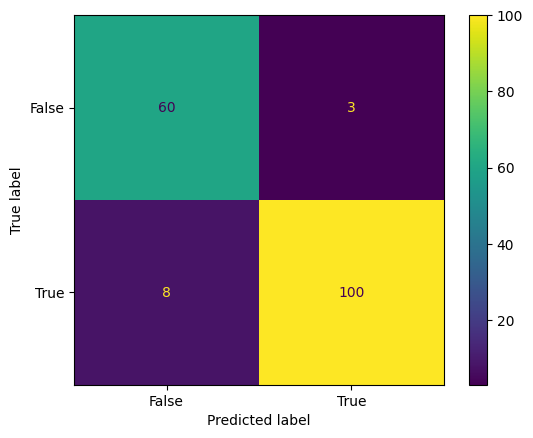

In [11]:
# Calculate confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True]) 

cm_display.plot() 

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

# Example usage
if __name__ == "__main__":
    # AND logic gate input
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate output

    # Initialize and train the perceptron
    p = Perceptron(learning_rate=0.1, n_iters=10)
    p.fit(X, y)

    # Predictions
    predictions = p.predict(X)
    print("Predictions:", predictions)

Predictions: [0 0 0 1]
